<a href="https://colab.research.google.com/github/minhaj1403/cs376-sp2023-final_project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing Perceptron for Spam Classification**




Deep Learning is arguably one of the most popular aspect of machine learning anyways, but it is important to understand the very foundation of artificial neural network, which is the **Perceptron**.

In traditional machine learning, the Perceptron is a linear machine learning algorithm for **binary classification tasks.**

We aim to implement perceptron for spam classification as spam filtering incorporates binary classification of data.

## What is Binary Classification?

* Classification simply refers to categorizing or labeling data into something depending on a criteria. Let's say we have a dataset of 500 dice rolls, and we need to separate data according results **less than 3, equal to 3, and greater than 3**. We understand, we can divide the data into three types according to the criteria. These are the classes of the data.

* **Binary classification** means we can only categorize or label data into exactly **two classes**. For example, a dataset for detecting fake currencies should generally contain two kinds of labels. Either a particular currency is 'fake' ($1$) or 'not fake' ($0$).

##Back to the Perceptrons...

* The Perceptron algorithm is a classification machine learning algorithm.

* It takes a row of data (can be the fake currency data with lots of features in rows) as input and predicts a class label (i.e. $0$ or $1$).

## Geometric Intuition

* Let's say in two dimenstional space (it means the data contain two features), we have data labelled as **X** or **O**.

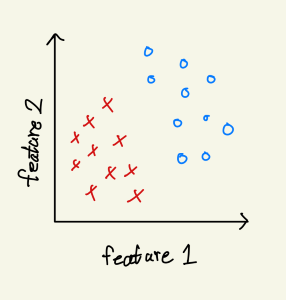

* The perceptron implements a hyperplane through training (in this case a straight line for 2D data) in such a way that it separates the **X** and **O** labelled data.

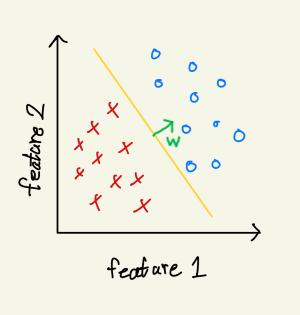


Let's say $\mathbf{x}$ corresponds to an arbitary data in the the dataset. Then the equation for hyperplane can be defined as:
$$\mathcal{H} = \{{\mathbf{x : } \mathbf{w^T x} + b} = 0\}$$

Whereas, $\mathbf{w}$ is the weight vector that defines the hyperplane and $b$ is the bias term.

# Prediction by Perceptron

* Now we know, how the hyperplane is defined, we can understand how the perceptron predicts label. Intuitively, the perceptron should check on what side of the hyperplane the test data falls.

* Mathematically, it means the perceptron checks the sign of $\mathbf{w^T x} + b$ for a given test data $\mathbf{x}$.

* If it is greater than zero, it predicts one label, and the vice versa if it is less than zero.



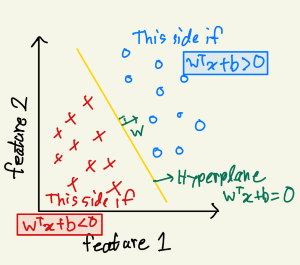

Now let's look into how a perceptron is trained. (Very untheme to discuss about training mechanism after testing, but it is better for understanding)

# Training Algorithm of a Perceptron

* We introduced the weight vector $\mathbf{w}$ for the hyperplane. **Initially the weight vector is set to zero.**

* Then the algorithm tests with data from the training set to check whether it misclassifies any data.

* Since the weight is initally set to zero, it will misclassify everything. Then it updates the value of the weight vector by adding the $y\mathbf{x}$ (the data point for which it misclassifed) to the weight vector.

* One thing to note that **as the weight vector updates, the hyperplane shifts accordingly**.

* This check is performed for all the data in the dataset. The algorithm stores the number of misclassifications for the check.

* When it finishes the check, we call the entire check one iteration. It will do the whole checking process (updating weight vector after checking with all the training data) untill the misclassification counts to zero. When the count goes to zero, we call it **convergence**.

The pseudocode is as follows:

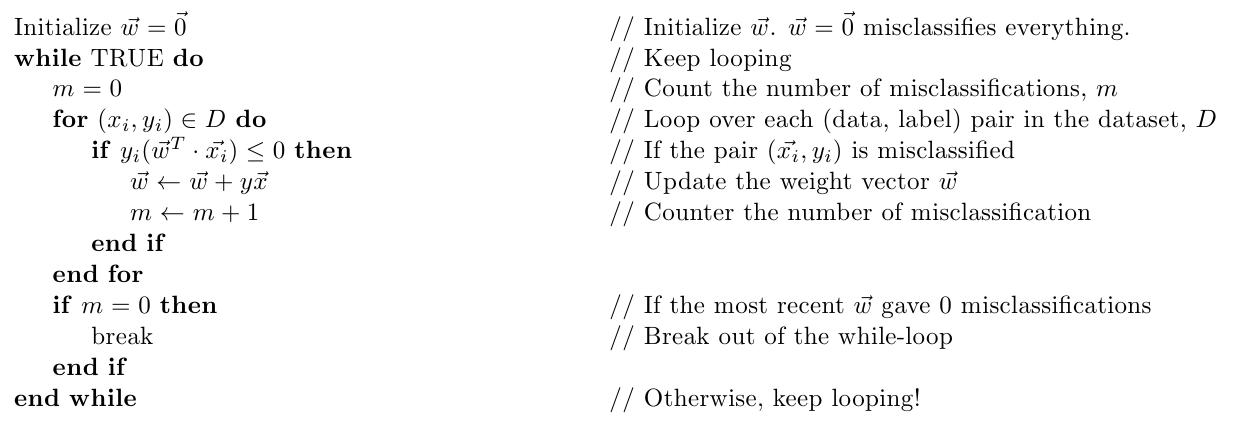

Let's have some observations of how it works!

We import the necessary libraries first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import feature_extraction, model_selection
from IPython.display import clear_output, display
import ipywidgets as widgets
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

We introduced some sample data. You can change or add data as you like. Note that:
 * The elements of X constitutes the features of the data.
 * The elements of y indicates the labels of the corresponding index of the data. It should be either 0 or 1.

We are working with two-dimensional data here, because it is easier for visualizing the decision boundary (the hyperplane).

In [2]:
# Sample data and labels
#You can add more data with labels either 0 or 1 as you like
#But make sure the number of elements in X and y are the same otherwise, it will raise error.

#[Feature1, Feature2]
X = np.array([[4, 1], [1, 3], [4, 2], [3, 5], [1, 3], [5, 6]])

#Either O or 1
y = np.array([0, 0, 1, 1, 0, 1])

assert len(X) == len(y)

As soon as we run the following cell, we need to scroll below quickly to observe the plot for every iteration.

If you have not changed the sample data and labels, the algorithm should converge after 55 iterations.

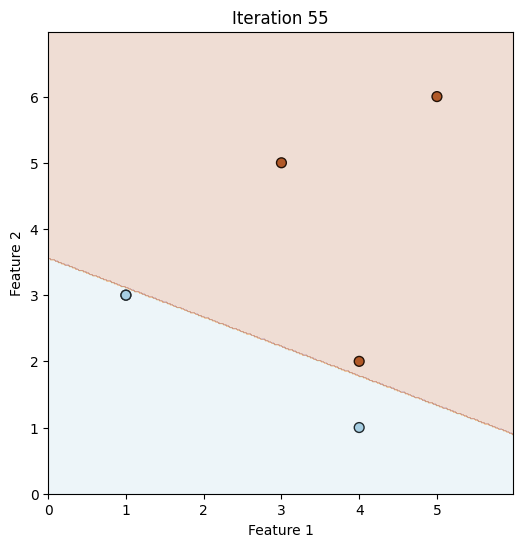

In [3]:
# Create the Perceptron object
perceptron = Perceptron()

# Initialize the perceptron weights and bias
perceptron.fit(X, y)

# Create a figure to display the plot
fig, ax = plt.subplots(figsize = (6, 6))

# Training loop
converged = False
iteration = 0
while not converged:
    # Update the plot
    ax.clear()

    # Plotting the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='black', s=50)

    # Generate a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot the decision boundary
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Add labels and title to the plot
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Iteration {iteration+1}')


    # Display the plot if converged or every iteration if not converged
    if converged or iteration % 1 == 0:
        display(fig)
        clear_output(wait=True)

    # Pause for a short duration to allow the plot to be displayed
    #Save the figure
    plt.pause(0.01)

    # Check if the perceptron has converged
    predictions = perceptron.predict(X)
    converged = np.all(predictions == y)

    # Perform one iteration of training if not converged
    if not converged:
        perceptron.partial_fit(X, y)
        display(fig)
        clear_output(wait=True)

    iteration += 1

# Clear the output after the loop ends
clear_output(wait=True)


Too quick?

If you want to check the boundary line step by step after each iteration run the following the cell!

But it will take some time. Have patience!

In [4]:
# Create the Perceptron object
new_perceptron = Perceptron()

# Initialize the perceptron weights and bias
new_perceptron.fit(X, y)

# Create a figure to display the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Training loop
converged = False
iteration = 0
while not converged:
    # Update the plot
    ax.clear()

    # Plotting the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='black', s=50)

    # Generate a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = new_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot the decision boundary
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Add labels and title to the plot
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Iteration {iteration+1}')
    clear_output(wait = True)

    # Save the plot if converged or every iteration if not converged
    if converged or iteration % 1 == 0:
        fig.savefig(f'2D_Perceptron_{iteration+1}.png')
        clear_output(wait=True)

    # Pause for a short duration to allow the plot to be displayed
    #Save the figure
    plt.pause(0.01)

    # Check if the perceptron has converged
    predictions = new_perceptron.predict(X)
    converged = np.all(predictions == y)

    # Perform one iteration of training if not converged and save the plot
    if not converged:
        new_perceptron.partial_fit(X, y)
        fig.savefig(f'2D_Perceptron_{iteration+1}.png')
        clear_output(wait=True)

    iteration += 1

# Clear the output after the loop ends
clear_output(wait=True)


#A function that will open file
def open_file(Iteration):
    clear_output(wait= True)
    plt.pause(0.001)
    file = open(f"2D_Perceptron_{Iteration}.png", 'rb')
    image = file.read()
    image = widgets.Image(
        value=image,
        format='png'
    )

    display(image)

#Widget for visualizing the hyperplane after each iteration.
widgets.interact(open_file, Iteration = (1,iteration, 1))

#It takes some time to generate so wait till the slider appears

interactive(children=(IntSlider(value=28, description='Iteration', max=55, min=1), Output()), _dom_classes=('w…

<function __main__.open_file(Iteration)>

You can confirm the followings as mentioned earlier:
* At iteration 1, there was no hyperplane (because the weight vector was set to null)

* The hyperplane shifts after every iteration

* The last picture effectively shows the convergence of the algorithm.

#Wondering about Convergence...

* One might wonder about the guarantee of the convergence of the algorithm. Non-convergence means the algorithm might end up forever finding the decision boundary hyperplane.

* However it is [provable](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html) that the number of iteration for the convergence of **the algorithm has an upper bound, and it is finite.**

* Thus, the algorithm is **guaranteed to find a decision boundary hyperplane for any dimensional data** that will separate the data in the binary manner.

# Applying Perceptron for Spam Classification

* We understood how the perceptron works as binary classifier. We want to implement this machine learning algorithm for spam classifcations.

* The task of detecting spams can be regard as a binary classification because the goal is to identify a **given text message** as either 'spam' or 'ham' (not-fake).

* **Traditionally, naive bayes classifier or support vector machine is used for spam detection, but we aim to use perceptron instead to investigate the results.**

We import a spam csv file of text messages from [Kaggle](https://www.kaggle.com/code/pablovargas/naive-bayes-svm-spam-filtering/notebook).

In [5]:
#import spam file as pandas dataframe
import requests
file_url = "https://raw.githubusercontent.com/minhaj1403/ML_Project/main/spam.csv"
r = requests.get(file_url)
data = pd.read_csv(file_url, encoding = 'latin-1')
data = data.iloc[:, :2]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We check the number of spams and hams in the dataset.

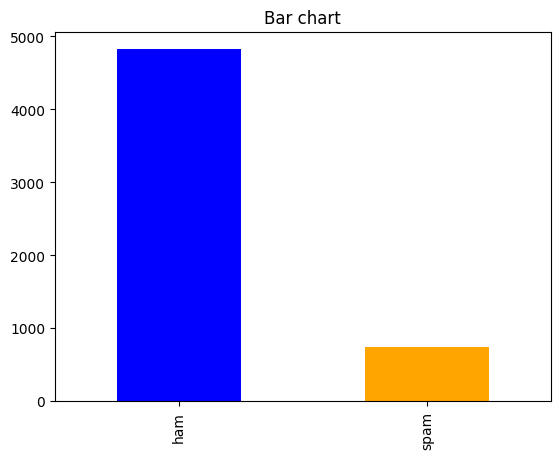

In [6]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

We want to observe the most frequent words in the spam and non-spam messages.

In [7]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(10)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(10)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

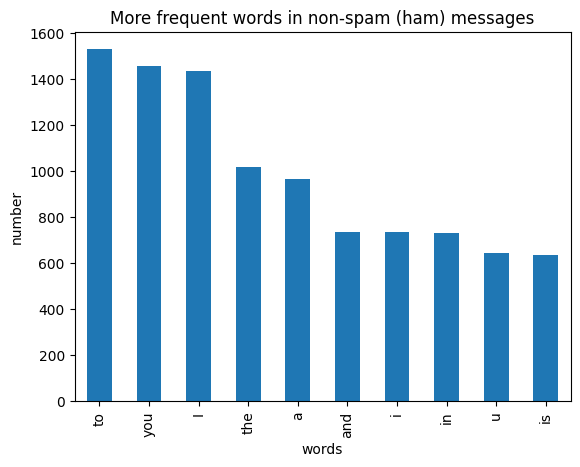

In [8]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam (ham) messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

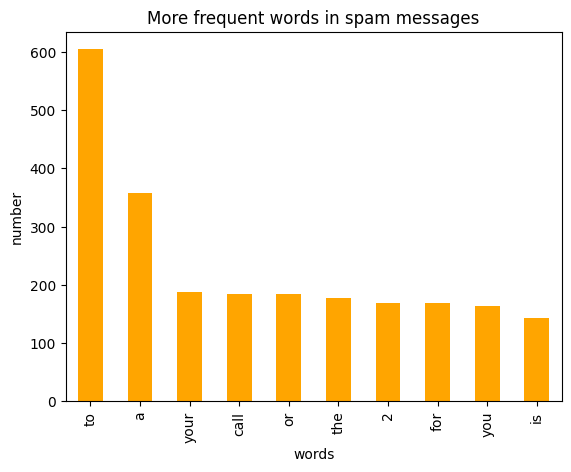

In [9]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

* We see most of the words are daily-use words from English, and we want to remove this **stop words** to improve the detection accuracy.

* Also, we need to convert the remaining words into categorical variables for analysis.

In [10]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])

We convert the labelling from 'spam' and 'ham' to binary set of values.

In [11]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})

We split the training set and test set.

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=12)

We do training and testing in the following cell.

In [13]:
# Training the model on perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Testing the model on testing dataset
y_pred = perceptron.predict(X_test)

Now, We check the evaluation metrics.

We start with finding the accuracy.


In [14]:
# Calculating the accuracy of the model
print(f'Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 3)} %')

Accuracy: 97.934 %


The Kaggle notebook we refered to for the dataset, used Multinomial Bayes Classifier and the accuracy was 97.96%. The accuracies are almost the same.

We check the confusion matrix for further understanding.

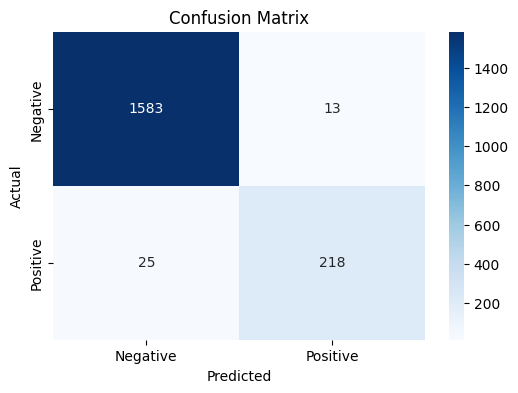

In [15]:
#Confusion matrix
cm = confusion_matrix(y_test,y_pred)
#print(confusion_matrix(y_test,y_pred))

# Define labels for the four quadrants of the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create a heatmap of the confusion matrix with labeled cells
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set x-axis tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])

# Set y-axis tick labels
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])


plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

And for the Multinomial Bayes Classifier, the confusion matrix was as follows:

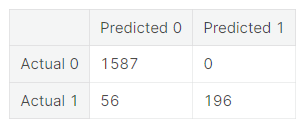

* Although the Multinomial Bayes Classifier with the best alpha did not misclassifiy any non-spam messages as spam messages, our perceptron algorithm misclassified **13 instances**.

* However, the misclassification for spam messages as non-spam is found **lower** for perceptron than that for the best alpha multinomial Bayes Classifier.

#Playground

You can play around with our model if you want!

But run the following cell first!

In [16]:
def predict(text):
    text = f.transform([text])
    prediction = perceptron.predict(text)
    if prediction == 1:
        print("This is a spam message")
    else:
        print("This is not a spam message")

perceptron = Perceptron()
perceptron.fit(X, data['v1'])
clear_output(wait = True)

You can try now!

In [17]:
#Provide your text replacing "hello world".

predict("hello world")
#returns "This is a spam message" or "This is not a spam message"

This is not a spam message


# Conclusion

It is important to note that the perceptron is a simple machine learning algorithm for binary classsication. But our model works better if the user prefers better spam detection than misclassification of non-spam messages.

# Reference



1.   Weinberger, Kilian. CS 4/5780: Intro to Machine Learning, Lecture 3: The Perceptron. www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html.
2.   Pablovargas. “Naive Bayes and SVM Spam Filtering.” www.kaggle.com, Oct. 2017, www.kaggle.com/code/pablovargas/naive-bayes-svm-spam-filtering/notebook.


